# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle


training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'
validation_file = './traffic-signs-data/valid.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)    
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np
# Number of training examples
trainshape = np.shape(y_train)
n_train =  trainshape[0]

# Number of testing examples.
testshape = np.shape(y_test)
n_test = testshape[0]

# Number of validsation examples.
validshape = np.shape(y_valid)
n_valid = validshape[0]

# What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0])

# How many unique classes/labels there are in the dataset.
n_classes = max(y_train)+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Plot Nr. 2 displaying traffic sign example with ID no.: 7
Plot Nr. 3 displaying traffic sign example with ID no.: 41


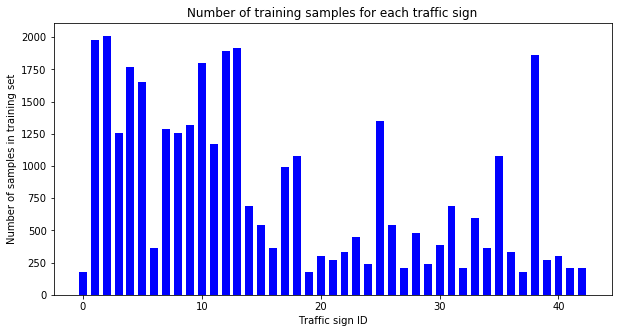

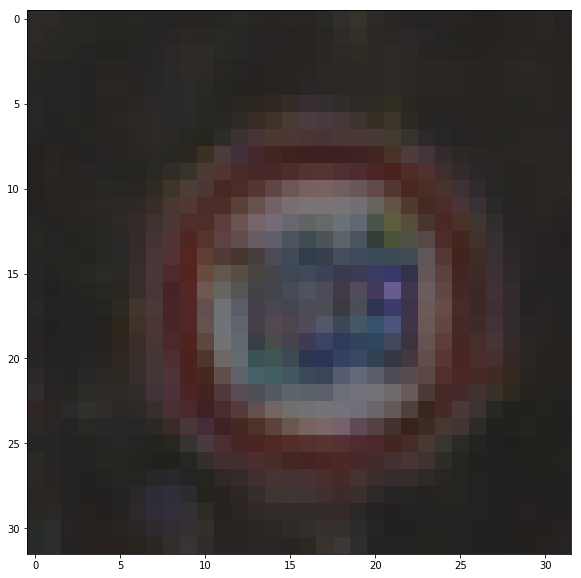

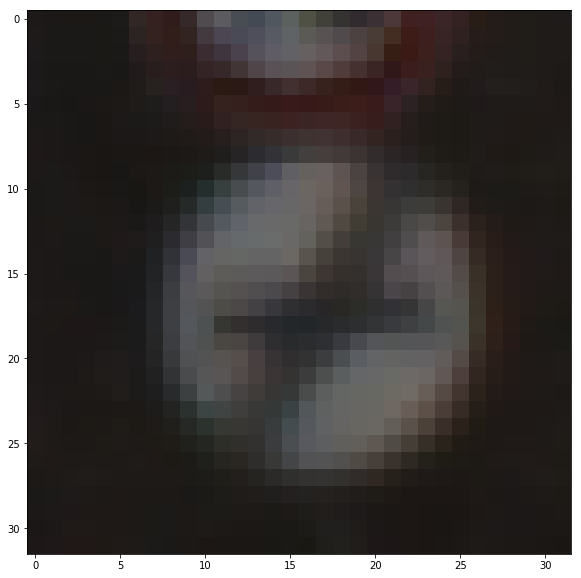

In [3]:
### Data exploration visualization 
import matplotlib.pyplot as plt


%matplotlib inline

Y = []

#for every traffic sign ID count no. of training samples and store in list Y.
for i in range(43):
    
    Y.append(sum(y_train==i))
    
# Plot Y as bar chart

plt.figure(1)
fig = plt.subplots(figsize=(10, 5))
N = len(Y)
x = range(N)
width = 1/1.5
plt.bar(x, Y, width, color="blue")
plt.savefig('./examples/barchart2.jpg')
plt.xlabel('Traffic sign ID')
plt.ylabel('Number of samples in training set')
plt.title('Number of training samples for each traffic sign')

#Plot image of training example Nr. 25000
plt.figure(2)
axs = plt.subplots(figsize=(10, 10))
print('Plot Nr. 2 displaying traffic sign example with ID no.:',y_train[25000])
axs = plt.imshow(X_train[25000])

#Plot image of training example Nr. 0
plt.figure(3)
axs = plt.subplots(figsize=(10, 10))
print('Plot Nr. 3 displaying traffic sign example with ID no.:',y_train[0])
axs = plt.imshow(X_train[0])



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
#resize images to 224x224x3 and save to directory
import cv2


def res_img(image_data, folder):

    for i, image in enumerate(image_data):
        imageresized = cv2.resize(image,(224,224), 0,0,interpolation=cv2.INTER_NEAREST)
        cv2.imwrite(folder+str(i)+'.jpg' ,imageresized)

print('finished')


finished


In [ ]:
#Normalize test, valid & test input images: 

def normalize(image_data):
    image_data = image_data.astype('float64')
    image_data -= np.mean(image_data, axis = 0) # zero-center
    image_data /= np.std(image_data, axis = 0) # normalize
    
    return image_data

### Model Architecture

In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers import Convolution2D, MaxPooling2D, Input, AveragePooling2D
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
import cv2, numpy as np
from keras.models import Model

base_model = ResNet50(include_top=False, weights='imagenet')

i=0
for layer in base_model.layers:
    if i>=37:
        layer.trainable = True
    else:
        layer.trainable = False
    i += 1

input = Input(shape=(224,224,3),name = 'image_input')
x = base_model(input)    
x = Flatten(name='flatten')(x)

#x = AveragePooling2D(pool_size=(2, 2), strides=None, name='averagepool')(x)
#x = Dense(1000, activation='relu', name='fc1')(x)

x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(43, activation='softmax', name='predictions')(x)

model = Model(input=input, output=x)


Using TensorFlow backend.


In [4]:
i=0
for layer in base_model.layers:
    i += 1
print(i)   
print(base_model.layers[38].name)

175
res3a_branch2a


In [12]:
from keras.models import load_model

model = load_model('resnet50_4epochs_rescale_zero_cent_retrain38up_3fc_layers.h5')

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255 - 0.5,
        #zca_whitening=True,
        rotation_range = 15,
        shear_range=0.2,
        channel_shift_range=0.3,
        width_shift_range=0.2,
        height_shift_range=0.2,    
        fill_mode='nearest',
        zoom_range=0.2
        )

test_datagen = ImageDataGenerator(
                rescale=1./255 -0.5,
                fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        './train_resized_img/',
        batch_size=16,
        target_size=(224, 224),
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        './valid_resized_img/',
        batch_size=16,
        target_size=(224, 224),
        class_mode='sparse')



Found 34677 images belonging to 43 classes.
Found 4410 images belonging to 43 classes.


Epoch 1/1
34677/34677 [==============================] - 623s - loss: 0.1020 - acc: 0.9762 - val_loss: 0.1355 - val_acc: 0.9744

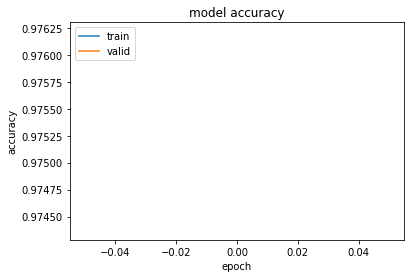

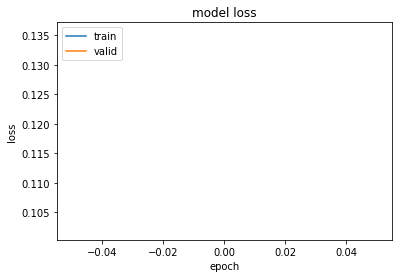

Training accuracy is  0.976209014621
Validation accuracy is  0.974376417234


In [26]:
import matplotlib.pyplot as plt
from keras import optimizers
#compile model


model.compile('adam', 'sparse_categorical_crossentropy', ['accuracy'])


history = model.fit_generator(
            train_generator,
            samples_per_epoch=34677,
            nb_epoch=1,
            validation_data=validation_generator,
            nb_val_samples=4410)

### make plots of loss and accuracy functions over epochs (on training and validation set)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
plt.savefig('./examples/acc.jpg')
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
plt.savefig('./examples/loss.jpg')
### Calculate and report the accuracy on the training and validation set.
print('Training accuracy is ',history.history['acc'][-1])
print('Validation accuracy is ',history.history['val_acc'][-1])
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [24]:
#model.save('resnet50_4epochs_rescale_zero_cent_retrain38up_3fc_layers.h5')

In [ ]:
#test evalute with test generator
print("Testing")

metrics = model.evaluate_generator(test_generator, )


evaluate_generator(self, generator, steps, max_q_size=10, workers=1, pickle_safe=False)


In [ ]:
#TEST & Evaluate Model

print("Testing")

metrics = model.evaluate(X_test_normalized, y_one_hot_test)
for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = metrics[metric_i]
    print('{}: {}'.format(metric_name, metric_value))

In [ ]:
#generator
from skimage.transform import resize 

def generator(X, y, batch_size=32):
        num_samples = len(X)
        while 1: # Loop forever  
            #X, y = shuffle(X, y)
            for offset in range(0, num_samples, batch_size):
                batch_samples_X = X[offset:offset+batch_size]
                batch_samples_y = y[offset:offset+batch_size]
                
                X_train_new = []
                for batch_sample in batch_samples_X:
                    resized_img = resize(batch_sample, (224, 224))
                    #normalized_img = normalize(resized_img)
                    #X_train_new.append(normalized_img)
                    X_train_new.append(resized_img)
                   
                X_train_new = np.array(X_train_new)
                y_train_new = np.array(batch_samples_y)
                yield X_train_new, y_train_new


train_generator = generator(X_train, y_one_hot_train, batch_size = 32)
validation_generator = generator(X_valid, y_one_hot_valid, batch_size = 32)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

### Predict the Sign Type for Each Image

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 10 new images. 

acc = np.argmax(y_predictions, axis=1)==y_test_web

acc = acc.astype('float64')
acc = sum(acc)/len(acc)*100
print(acc,'% : the model predicted ', int(acc/10), ' out of 10 signs correctly') 


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
import tensorflow as tf

with tf.Session() as sess:
    print(sess.run(tf.nn.top_k(y_predictions, k=5, sorted=True)))

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [3]:
# utility functions
from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    pl.colorbar(im, cax=cax)

In [18]:
import numpy as np
import cv2 
import pylab as pl
import matplotlib.pyplot as plt
from keras import backend as K


# K.learning_phase() is a flag that indicates if the network is in training or
# predict phase. It allow layer (e.g. Dropout) to only be applied during training
inputs = [K.learning_phase()] + base_model.inputs

_activation_10 = K.function(inputs, [base_model.layers[37].output])
def activation_f(X):
    # The [0] is to disable the training phase flag
    return _activation_10([0] + [X])


X = cv2.imread('./test_resized_img/0.jpg')
X = np.reshape(X, (1,224,224,3))
print(X.shape)




# Visualize convolution result (after activation)
C1 = activation_f(X)

C1 = np.squeeze(C1)
C1 = np.reshape[C1,-1]
print("C1 shape : ", C1.shape)

pl.figure(figsize=(15, 15))
pl.suptitle('convout1')
plt.imshow(C1)

#get_activation_10 = K.function([base_model.get_input_at(0)],[base_model.layers[37].output]) 
#convout1_f = theano.function([model.get_input(train=False)], convout1.get_output(train=False))

#activation_output = get_activation_10([input_image])#[0]

(1, 224, 224, 3)


TypeError: 'function' object is not subscriptable

In [34]:
import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in xrange(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic

#pl.imshow(make_mosaic(np.random.random((9, 10, 10)), 3, 3, border=1))



In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
#print(model.get_config())

#print(model.layers[0].get_config())
#print(model.count_params())
model.get_config()
#model.layers[0].get_config()
#model.layers[0].count_params()


# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state 
#                of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets 
#                     min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number 
#          for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 